# Análisis Descriptivo ENO

### 1. Introducción

Este notebook presenta un análisis descriptivo y visual de los datos sobre las enfermedades de notificación obligatoria (ENO) en Chile. Exploraremos la distribución de las enfermedades, su evolución temporal, y otros factores relevantes.

Descripción del conjunto de datos: El Departamento de Epidemiología del Ministerio de Salud de Chile pone a disposición pública, archivo con bases de datos de algunas Enfermedades de Notificación Obligatoria (ENO) que se encuentran bajo vigilancia epidemiológica según lo establece el Decreto Supremo N°7/2019 MINSAL. Los datos corresponden al periodo 2007- 2022. Las ENO en la base de datos son: Arbovirus, Botulismo Adulto, Botulismo Infantil, Brucelosis, Carbunco, Chagas, Cisticercosis, Coqueluche, Creutzfeldt-Jakob, Difteria, Enfermedad meningocócica, Fiebre Tifoidea y Paratifoidea, Fiebre Q, Hepatitis A, Hepatitis B, Hepatitis C, Hepatitis E, Hidatidosis (Equinococosis), Infección gonocócica, Lepra, Leptospirosis, Malaria, Meningitis Bacteriana, MPOX, Parotiditis, Psitacosis, Sarampión, Sífilis, Síndrome Pulmonar por Hantavirus, Tétanos, Triquinosis, VIH.

Consideraciones:

- Los años 2019 al 2022 están sujetos a validación, por lo que podrían ser modificados en la siguiente actualización de datos. 
- Existen algunos campos que se encuentran vacíos desde el 2007-2018 debido a cambios realizados en los sistemas de información de notificación.

### 2. Carga y Exploración de Datos

In [8]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from scipy import stats

# inhabilita warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('C:/Users/aalei/Desktop/github_dq/Datos/ENO Notification/eno_cleaned.csv', index_col=0)
print('Rows: ', df.shape[0], '  Columns: ', df.shape[1])
df.head(2)

Rows:  294352   Columns:  17


,etapa_clinica,region,seremi,nacionalidad,cie_10_diagnostico,diagnostico,anho_notificacion,ENO,pueblo_indigena,nombre_instruccion,existe_coinfeccion,via_transmision,uso_preservativo,pais_contagio,sexo,grupo_edad,codigo_comuna_residencia
0,CONFIRMADA,Región de Tarapacá,TARAPACÁ,Extranjero,A97.0,Dengue sin datos de alarma,2020,Arbovirus,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,mujer,25-29,01107
1,CONFIRMADA,Región de Valparaíso,VALPARAÍSO,Desconocido,A90.X,Fiebre del dengue,2018,Arbovirus,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,hombre,70-74,05301


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294352 entries, 0 to 294351
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   etapa_clinica             294352 non-null  object
 1   region                    294352 non-null  object
 2   seremi                    294352 non-null  object
 3   nacionalidad              294352 non-null  object
 4   cie_10_diagnostico        294352 non-null  object
 5   diagnostico               294352 non-null  object
 6   anho_notificacion         294352 non-null  int64 
 7   ENO                       294352 non-null  object
 8   pueblo_indigena           294352 non-null  object
 9   nombre_instruccion        294352 non-null  object
 10  existe_coinfeccion        294352 non-null  object
 11  via_transmision           294352 non-null  object
 12  uso_preservativo          294352 non-null  object
 13  pais_contagio             294352 non-null  object
 14  sexo     

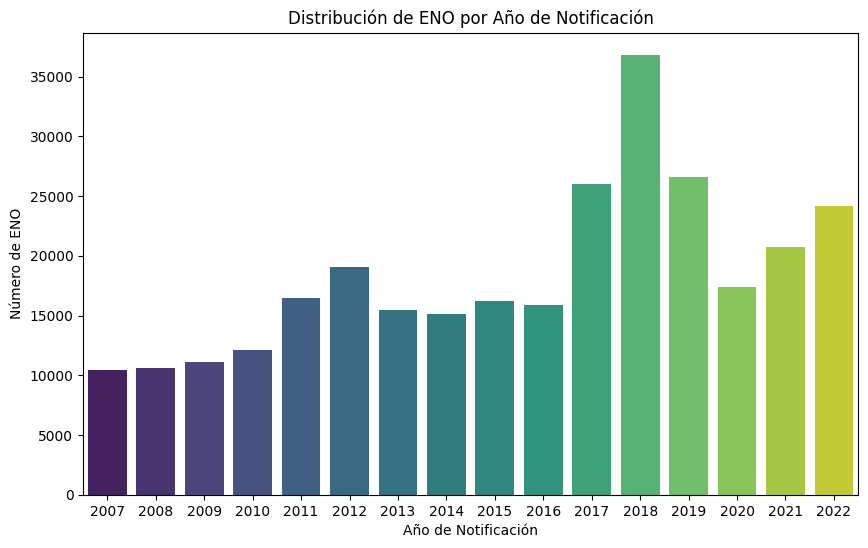

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='anho_notificacion', palette='viridis')
plt.title('Distribución de ENO por Año de Notificación')
plt.xlabel('Año de Notificación')
plt.ylabel('Número de ENO')
plt.show()

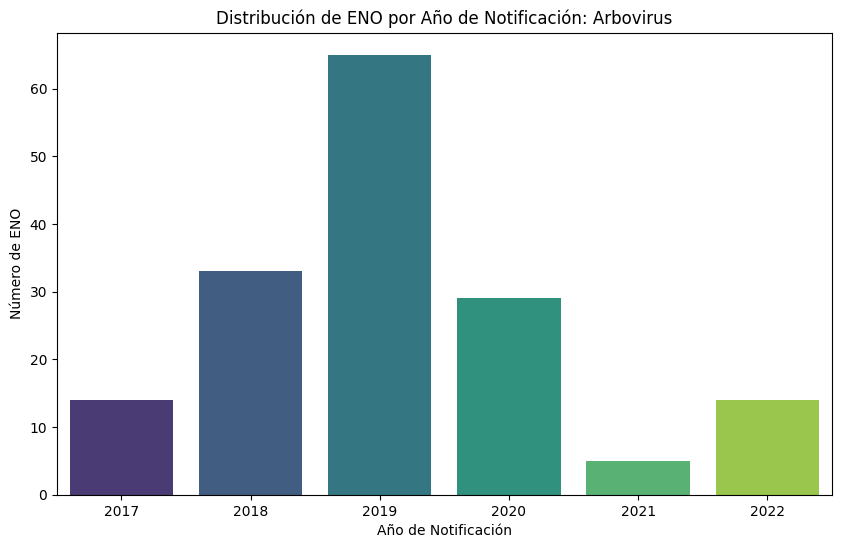

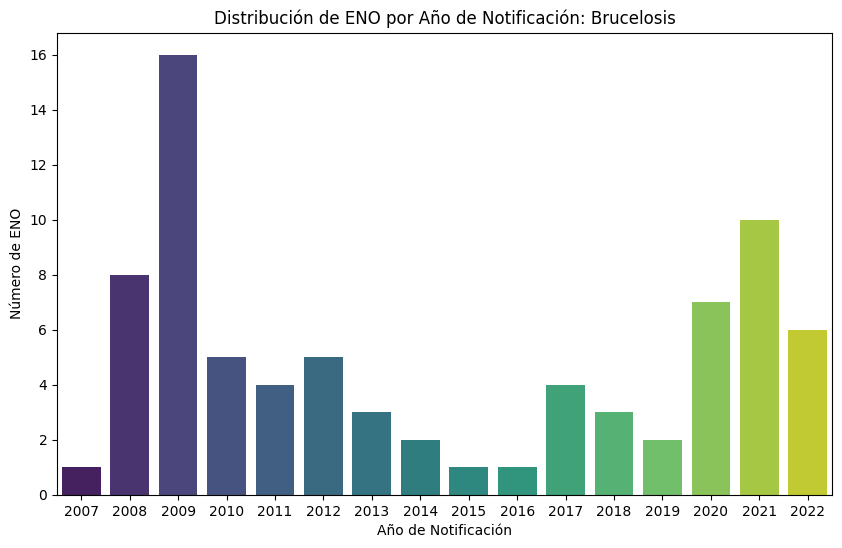

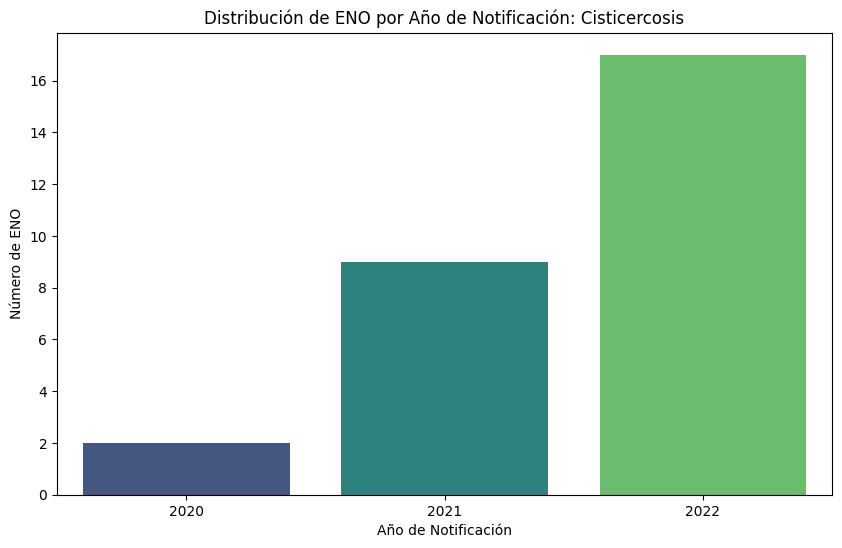

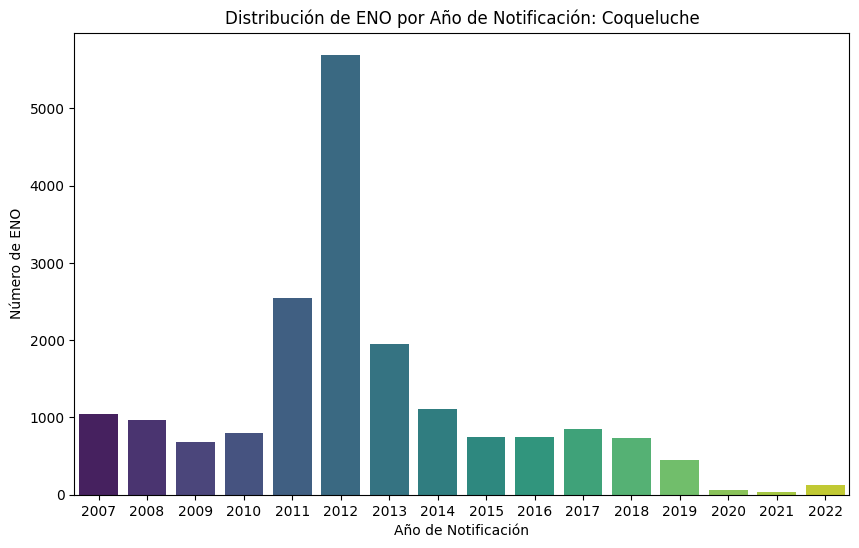

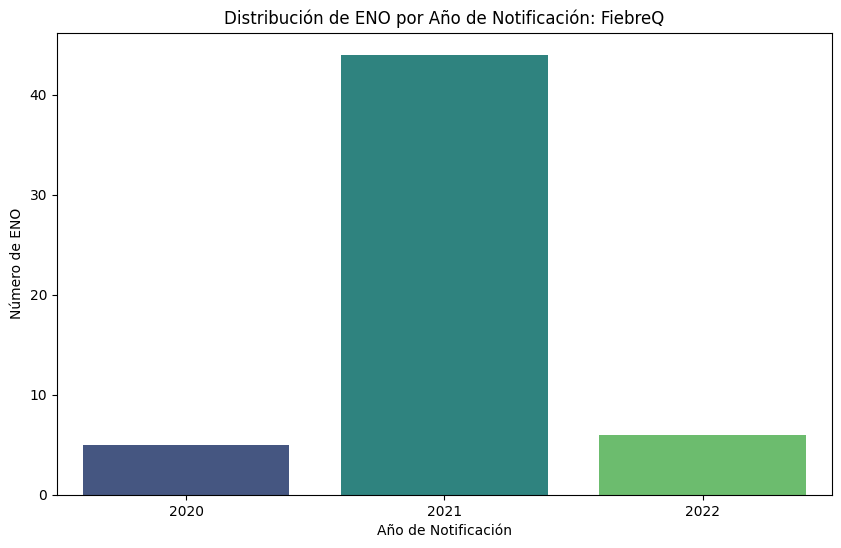

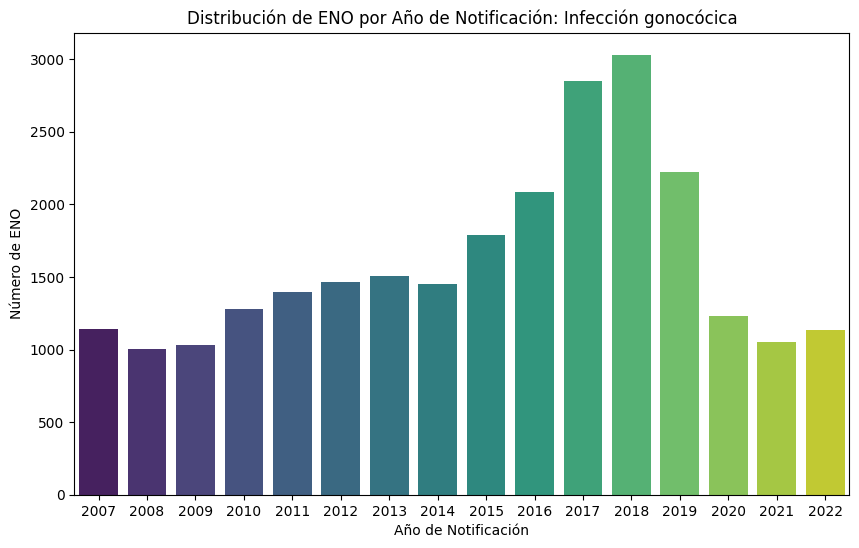

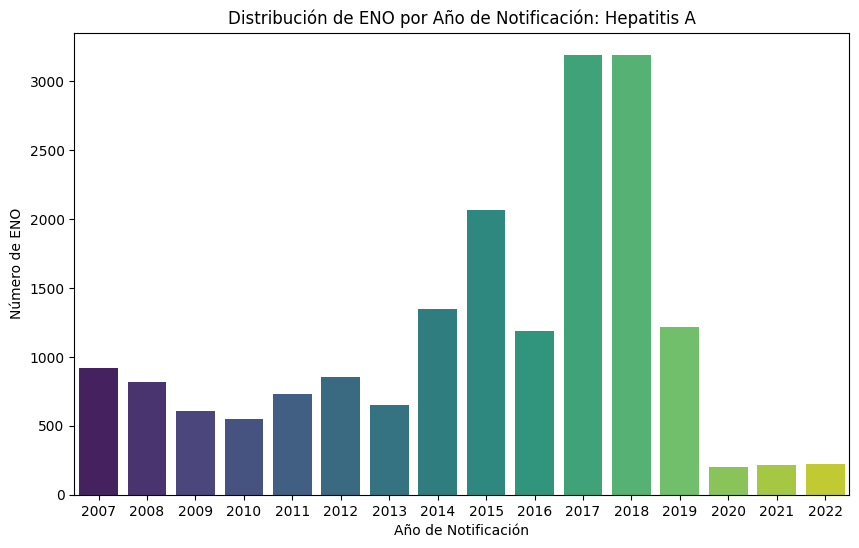

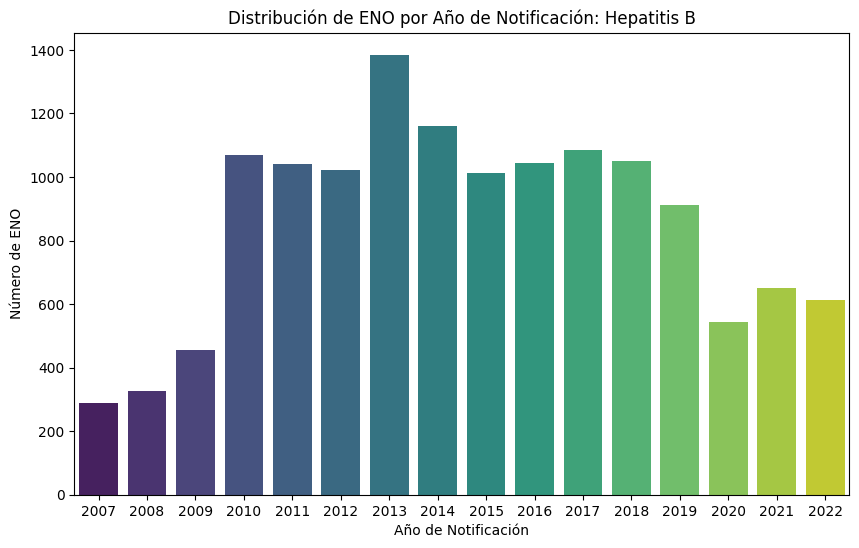

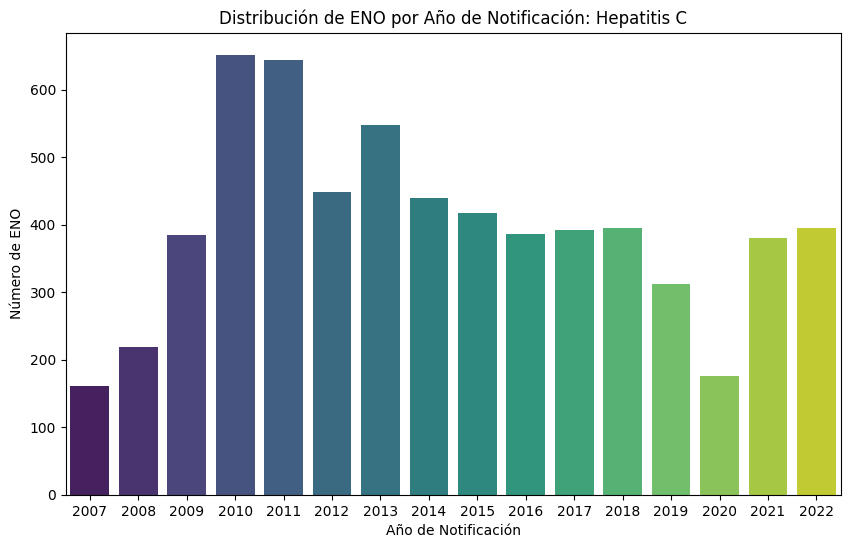

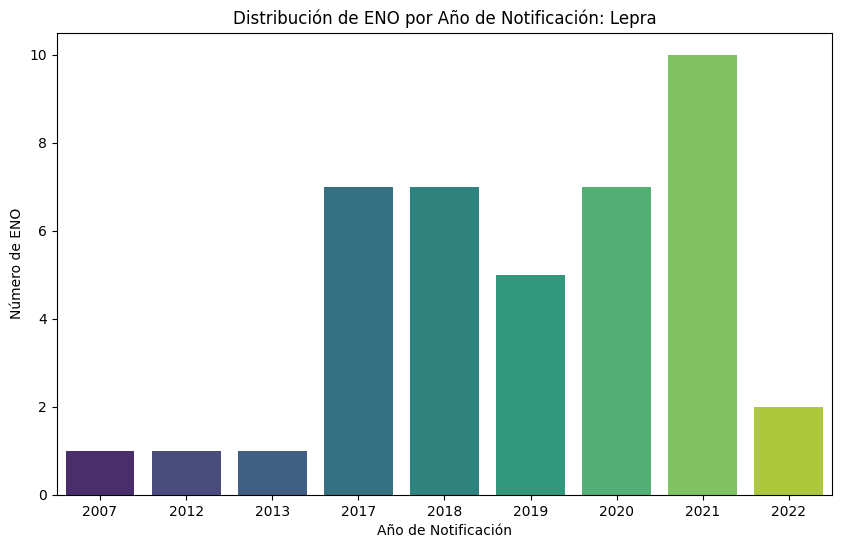

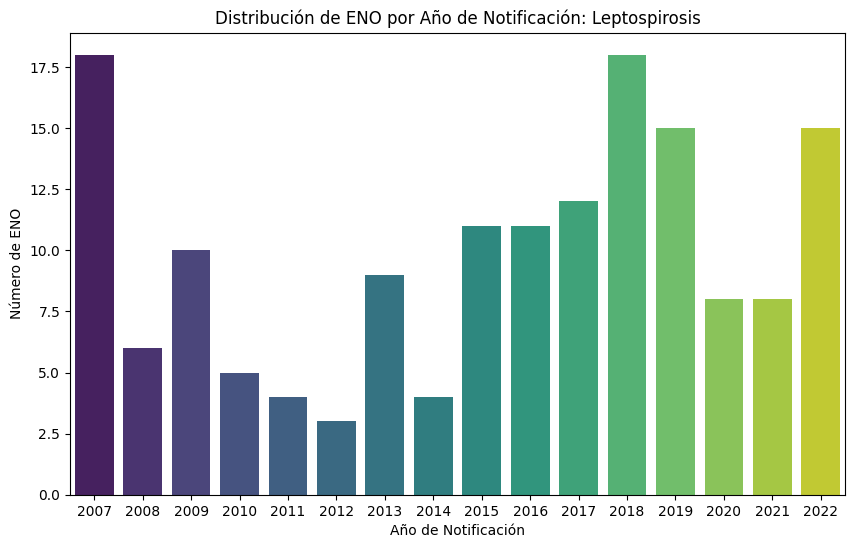

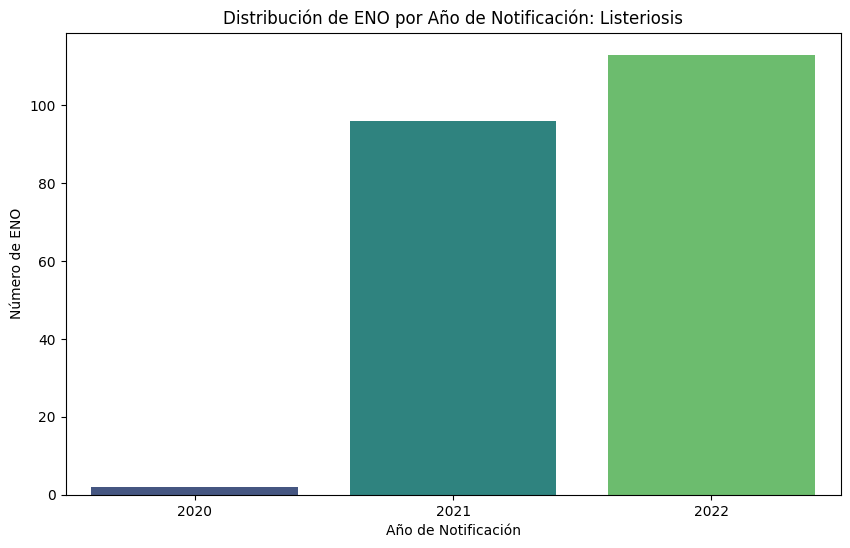

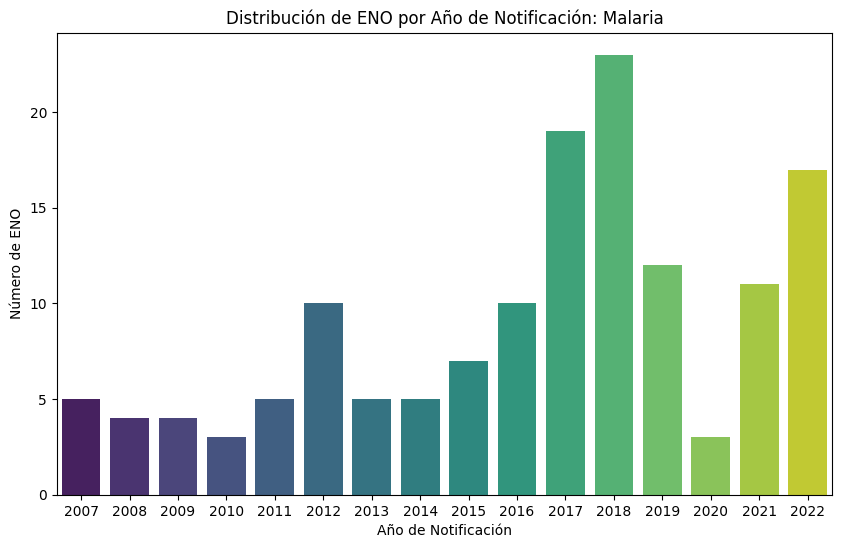

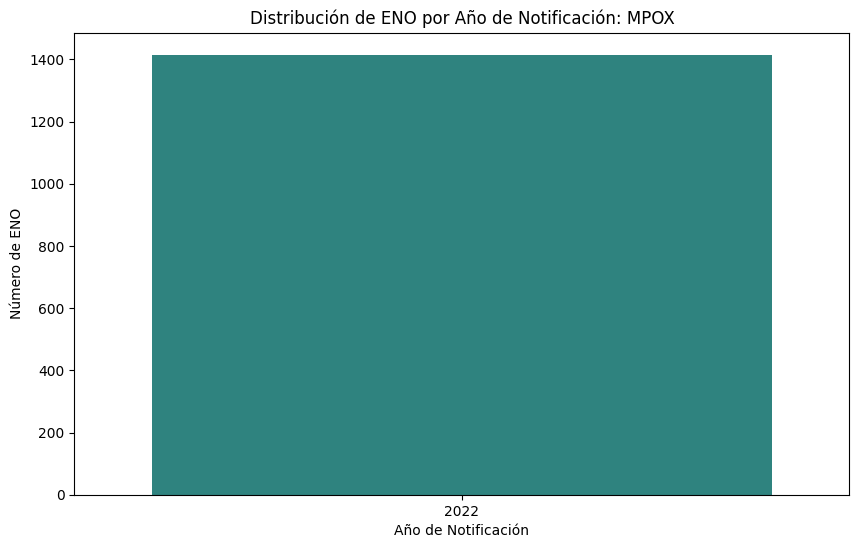

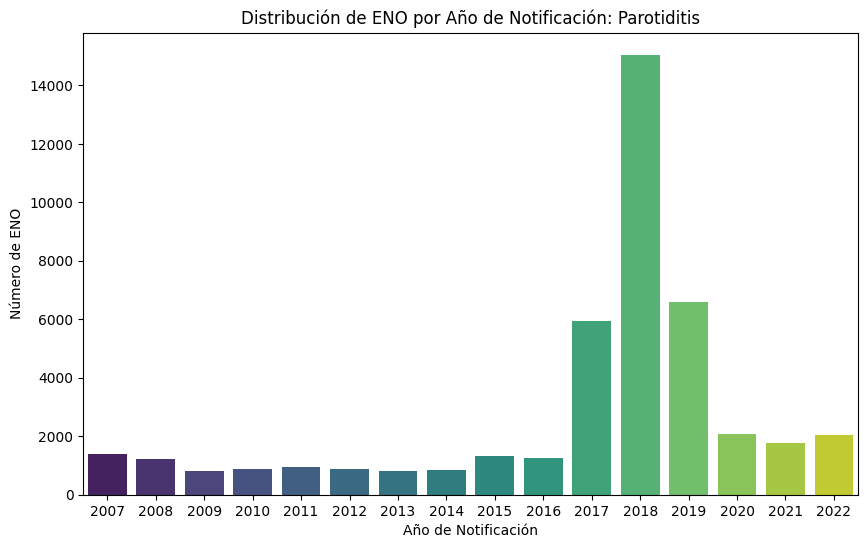

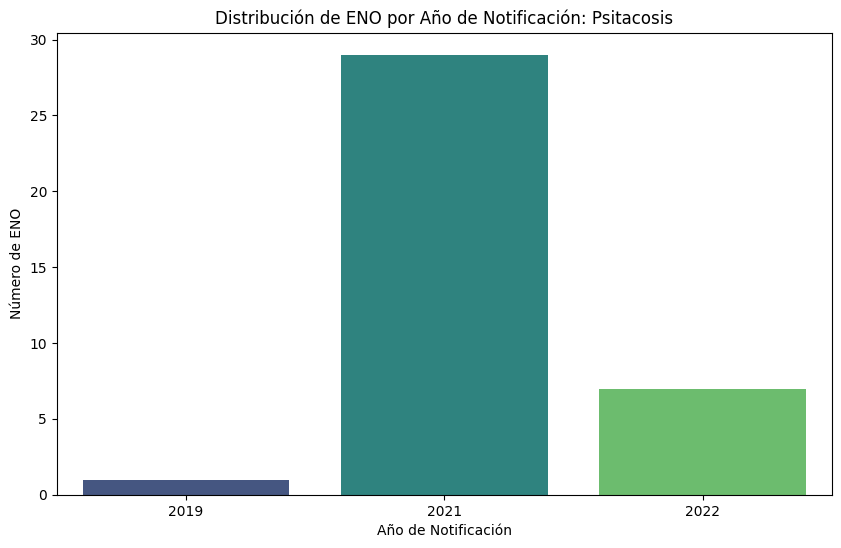

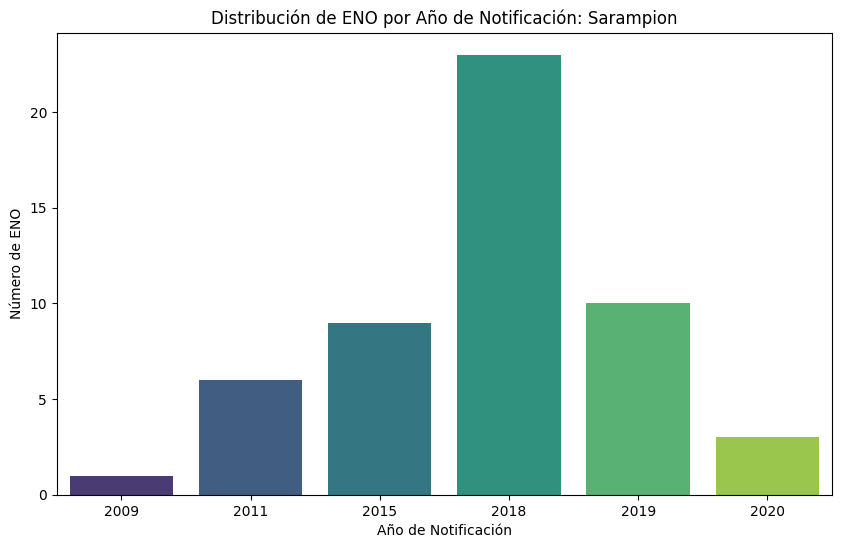

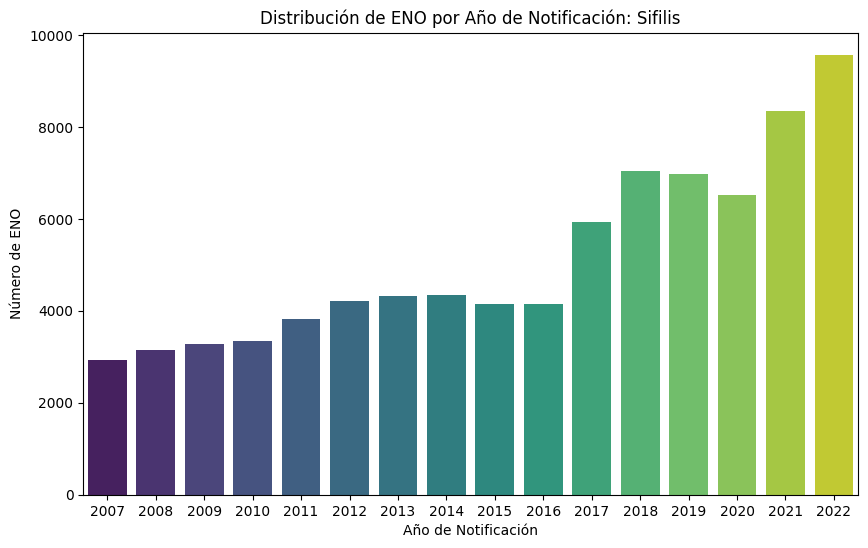

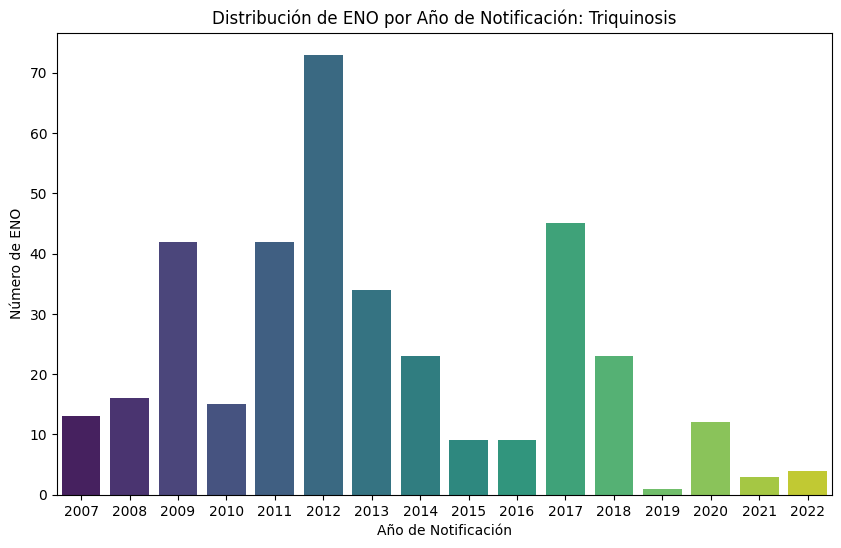

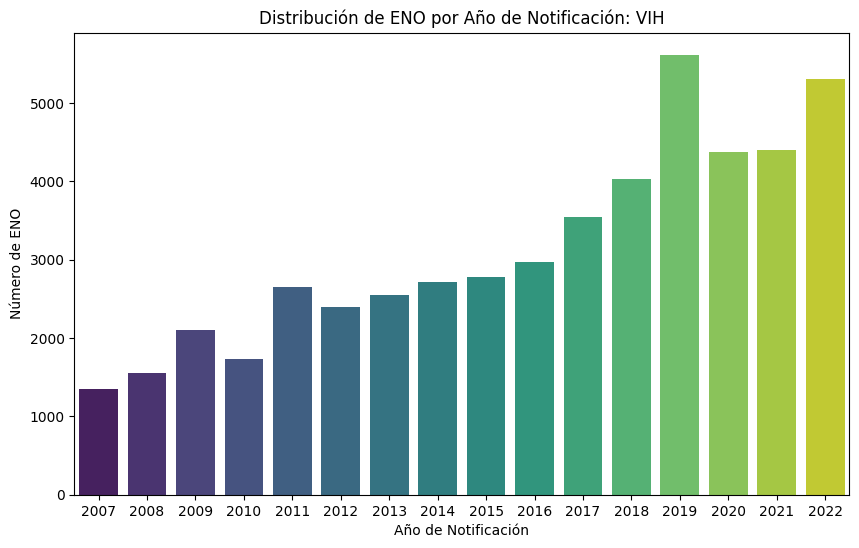

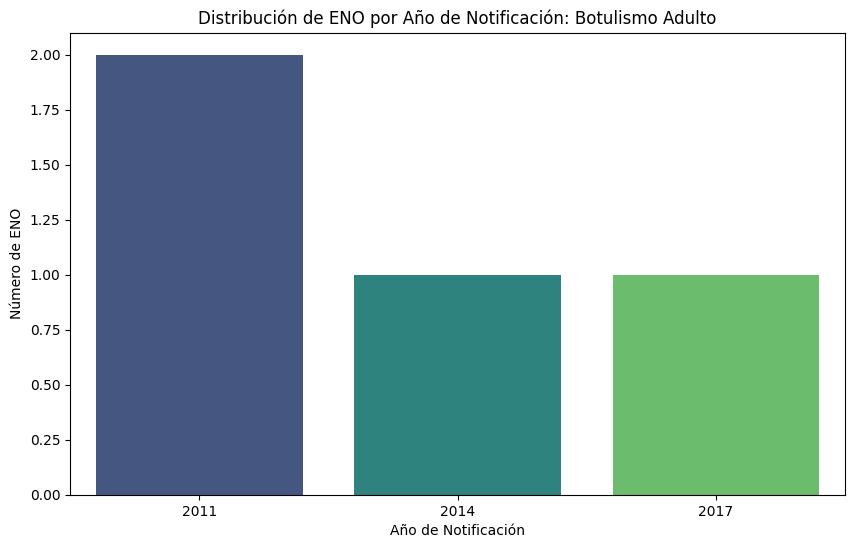

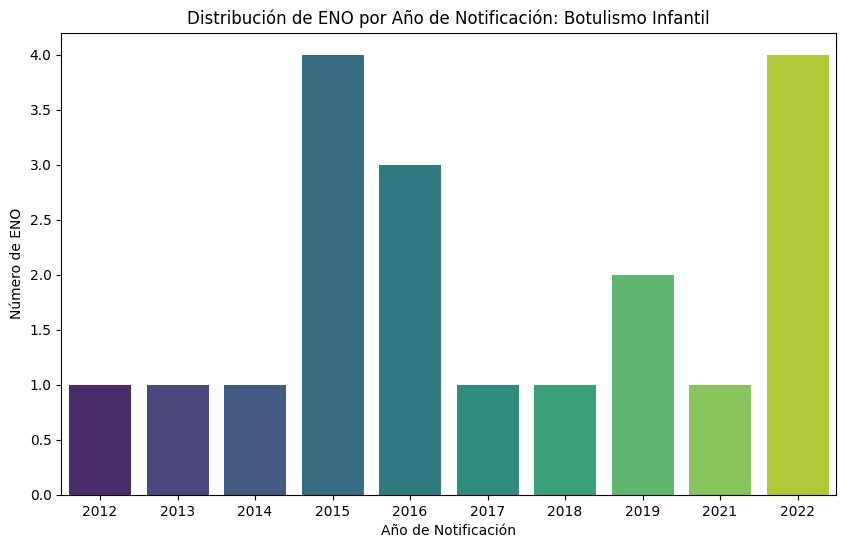

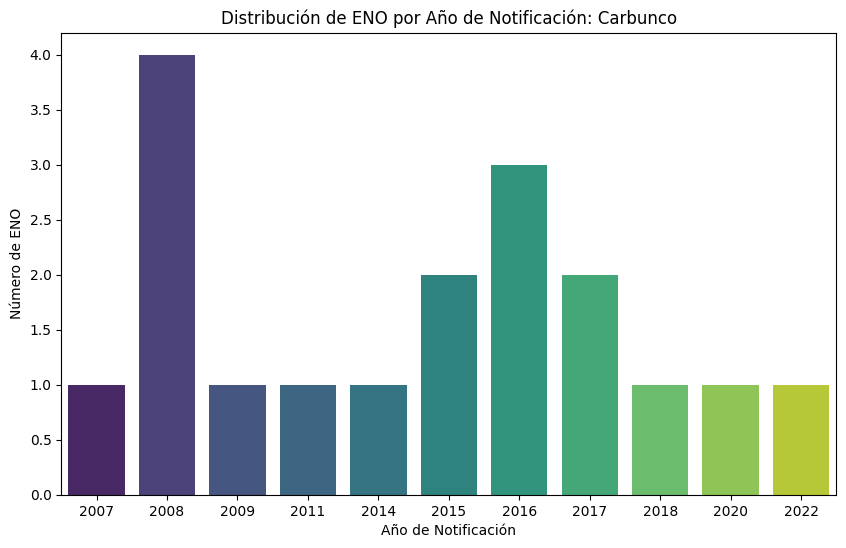

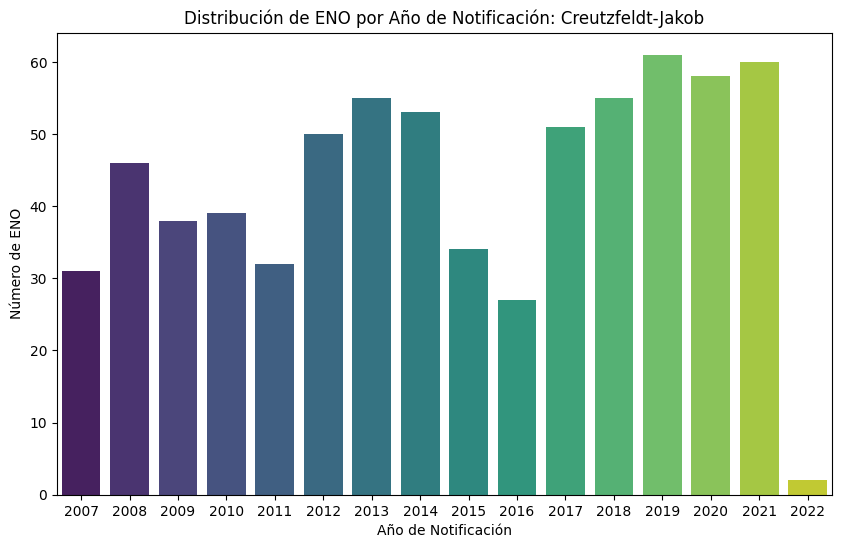

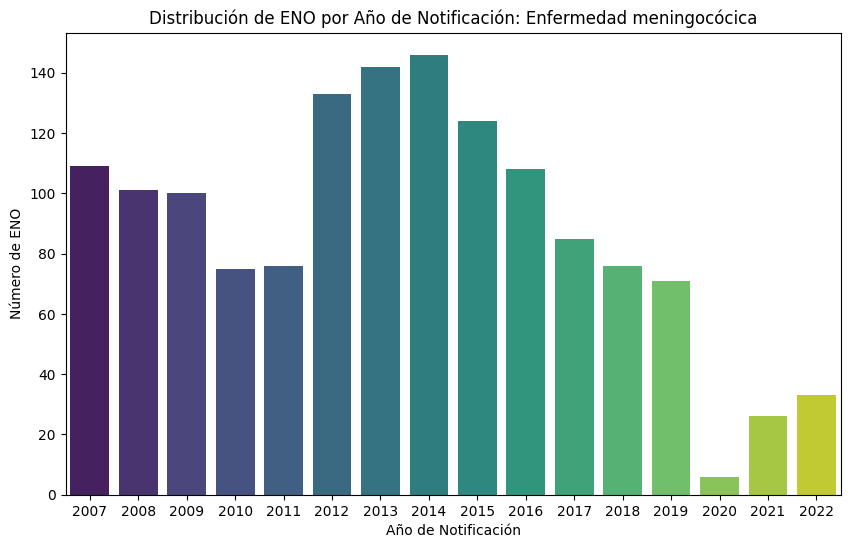

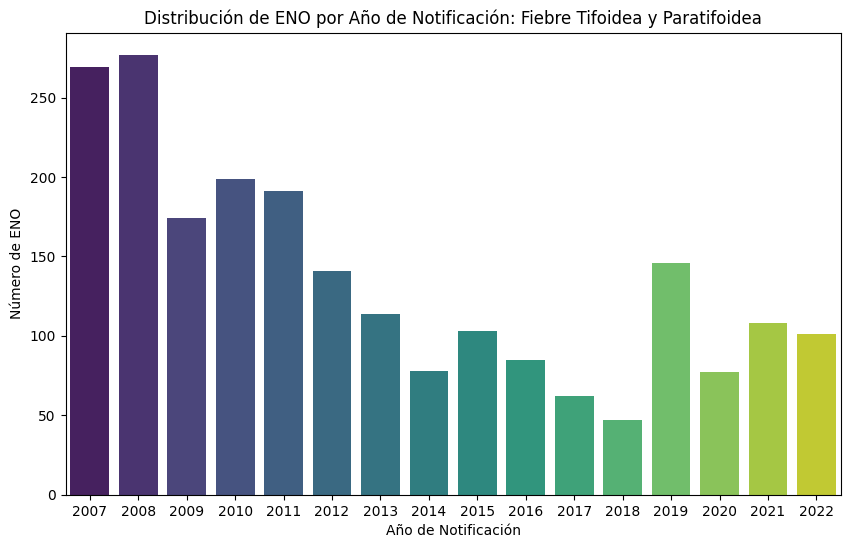

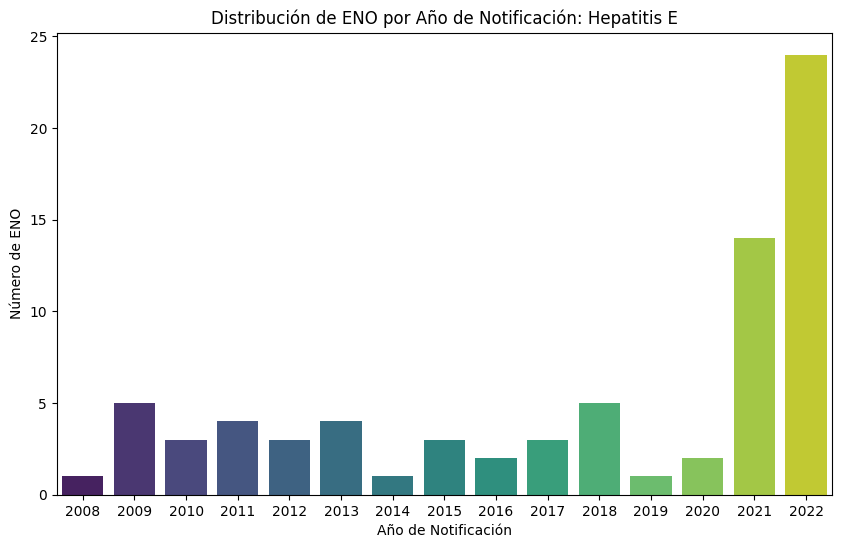

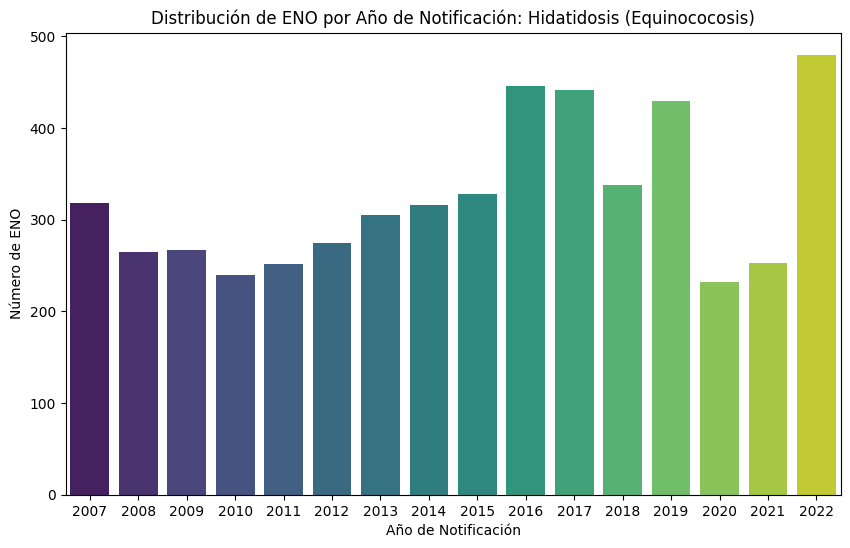

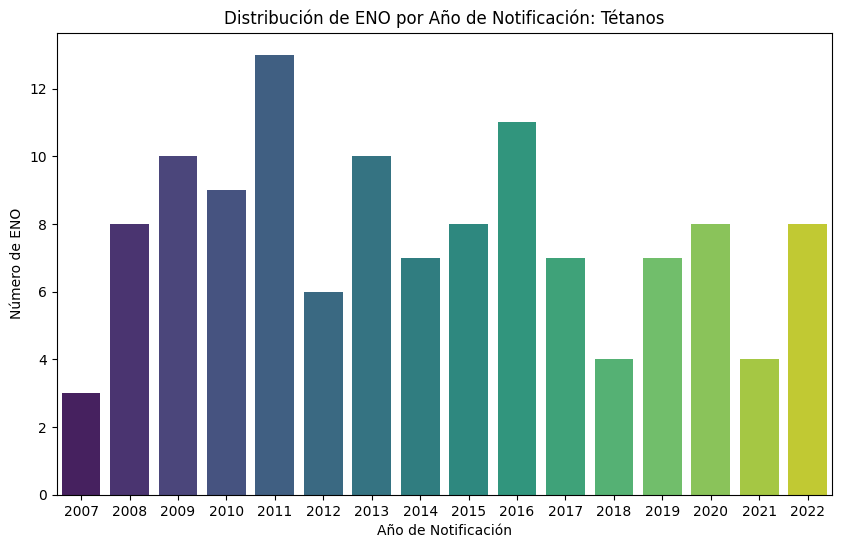

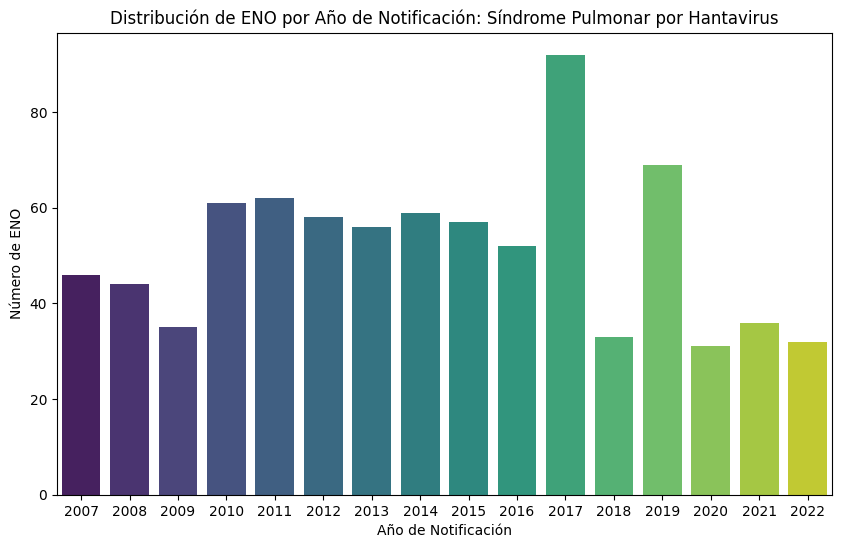

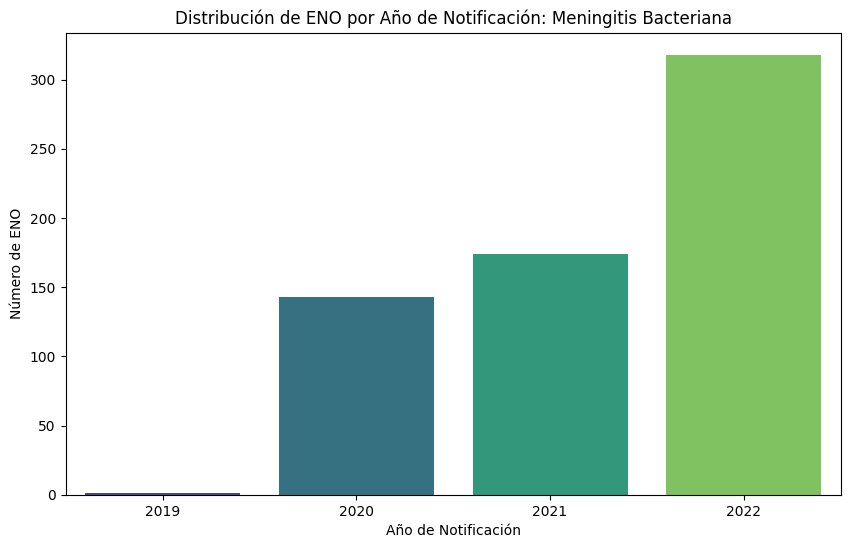

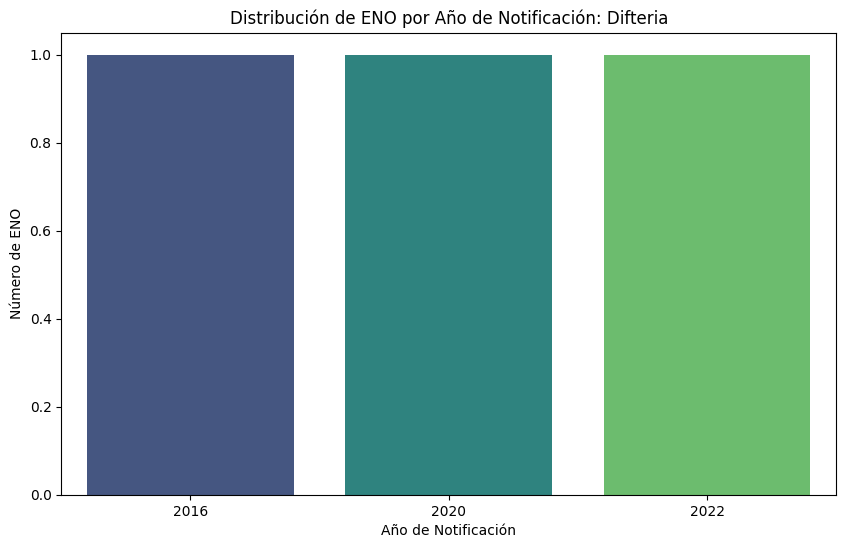

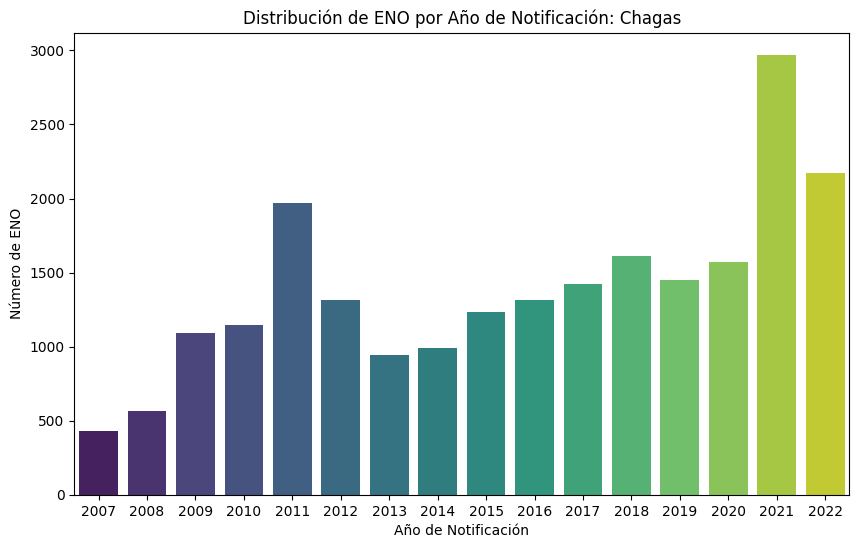

In [15]:
enos = df['ENO'].unique()

# Crear un gráfico individual para cada valor de ENO
for eno in enos:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df[df['ENO'] == eno], x='anho_notificacion', palette='viridis')
    plt.title(f'Distribución de ENO por Año de Notificación: {eno}')
    plt.xlabel('Año de Notificación')
    plt.ylabel('Número de ENO')
    plt.show()